##Import libraries

In [ ]:
import pandas as pd #thư viện mã nguồn mở, hỗ trợ thao tác kĩ thuật
import numpy as np #thư viện toán học
import matplotlib.pyplot as plt #thư viện để vẽ biểu đồ
import seaborn as sns #vẽ biểu đồ => tốt hơn matplotlib khi hoạt động trên dataframes

## Import Dataset
Here we can see that we have variables, we can also see that we don't have null values.
- RowNumber: corresponds to the record (row) number and has no effect on the output.
- CustomerId: contains random values and has no effect on customer leaving the bank.
- Surname: the surname of a customer has no impact on their decision to leave the bank.
- CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
- Geography: a customer’s location can affect their decision to leave the bank.
- Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
- Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
- Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
- Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
- NumOfProducts: refers to the number of products that a customer has purchased through the bank.
- HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
- IsActiveMember: active customers are less likely to leave the bank.
- EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
- Exited: whether or not the customer left the bank.
- Complain: customer has complaint or not.
- Satisfaction Score: Score provided by the customer for their complaint resolution.
- Card Type: type of card hold by the customer.
- Points Earned: the points earned by the customer for using credit card.

In [ ]:
df=pd.read_csv('Customer-Churn-Records.csv')

In [ ]:
# Check the dimensions of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10000
Number of columns: 18


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


## EDA

<ipython-input-8-2632dfddc7cc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

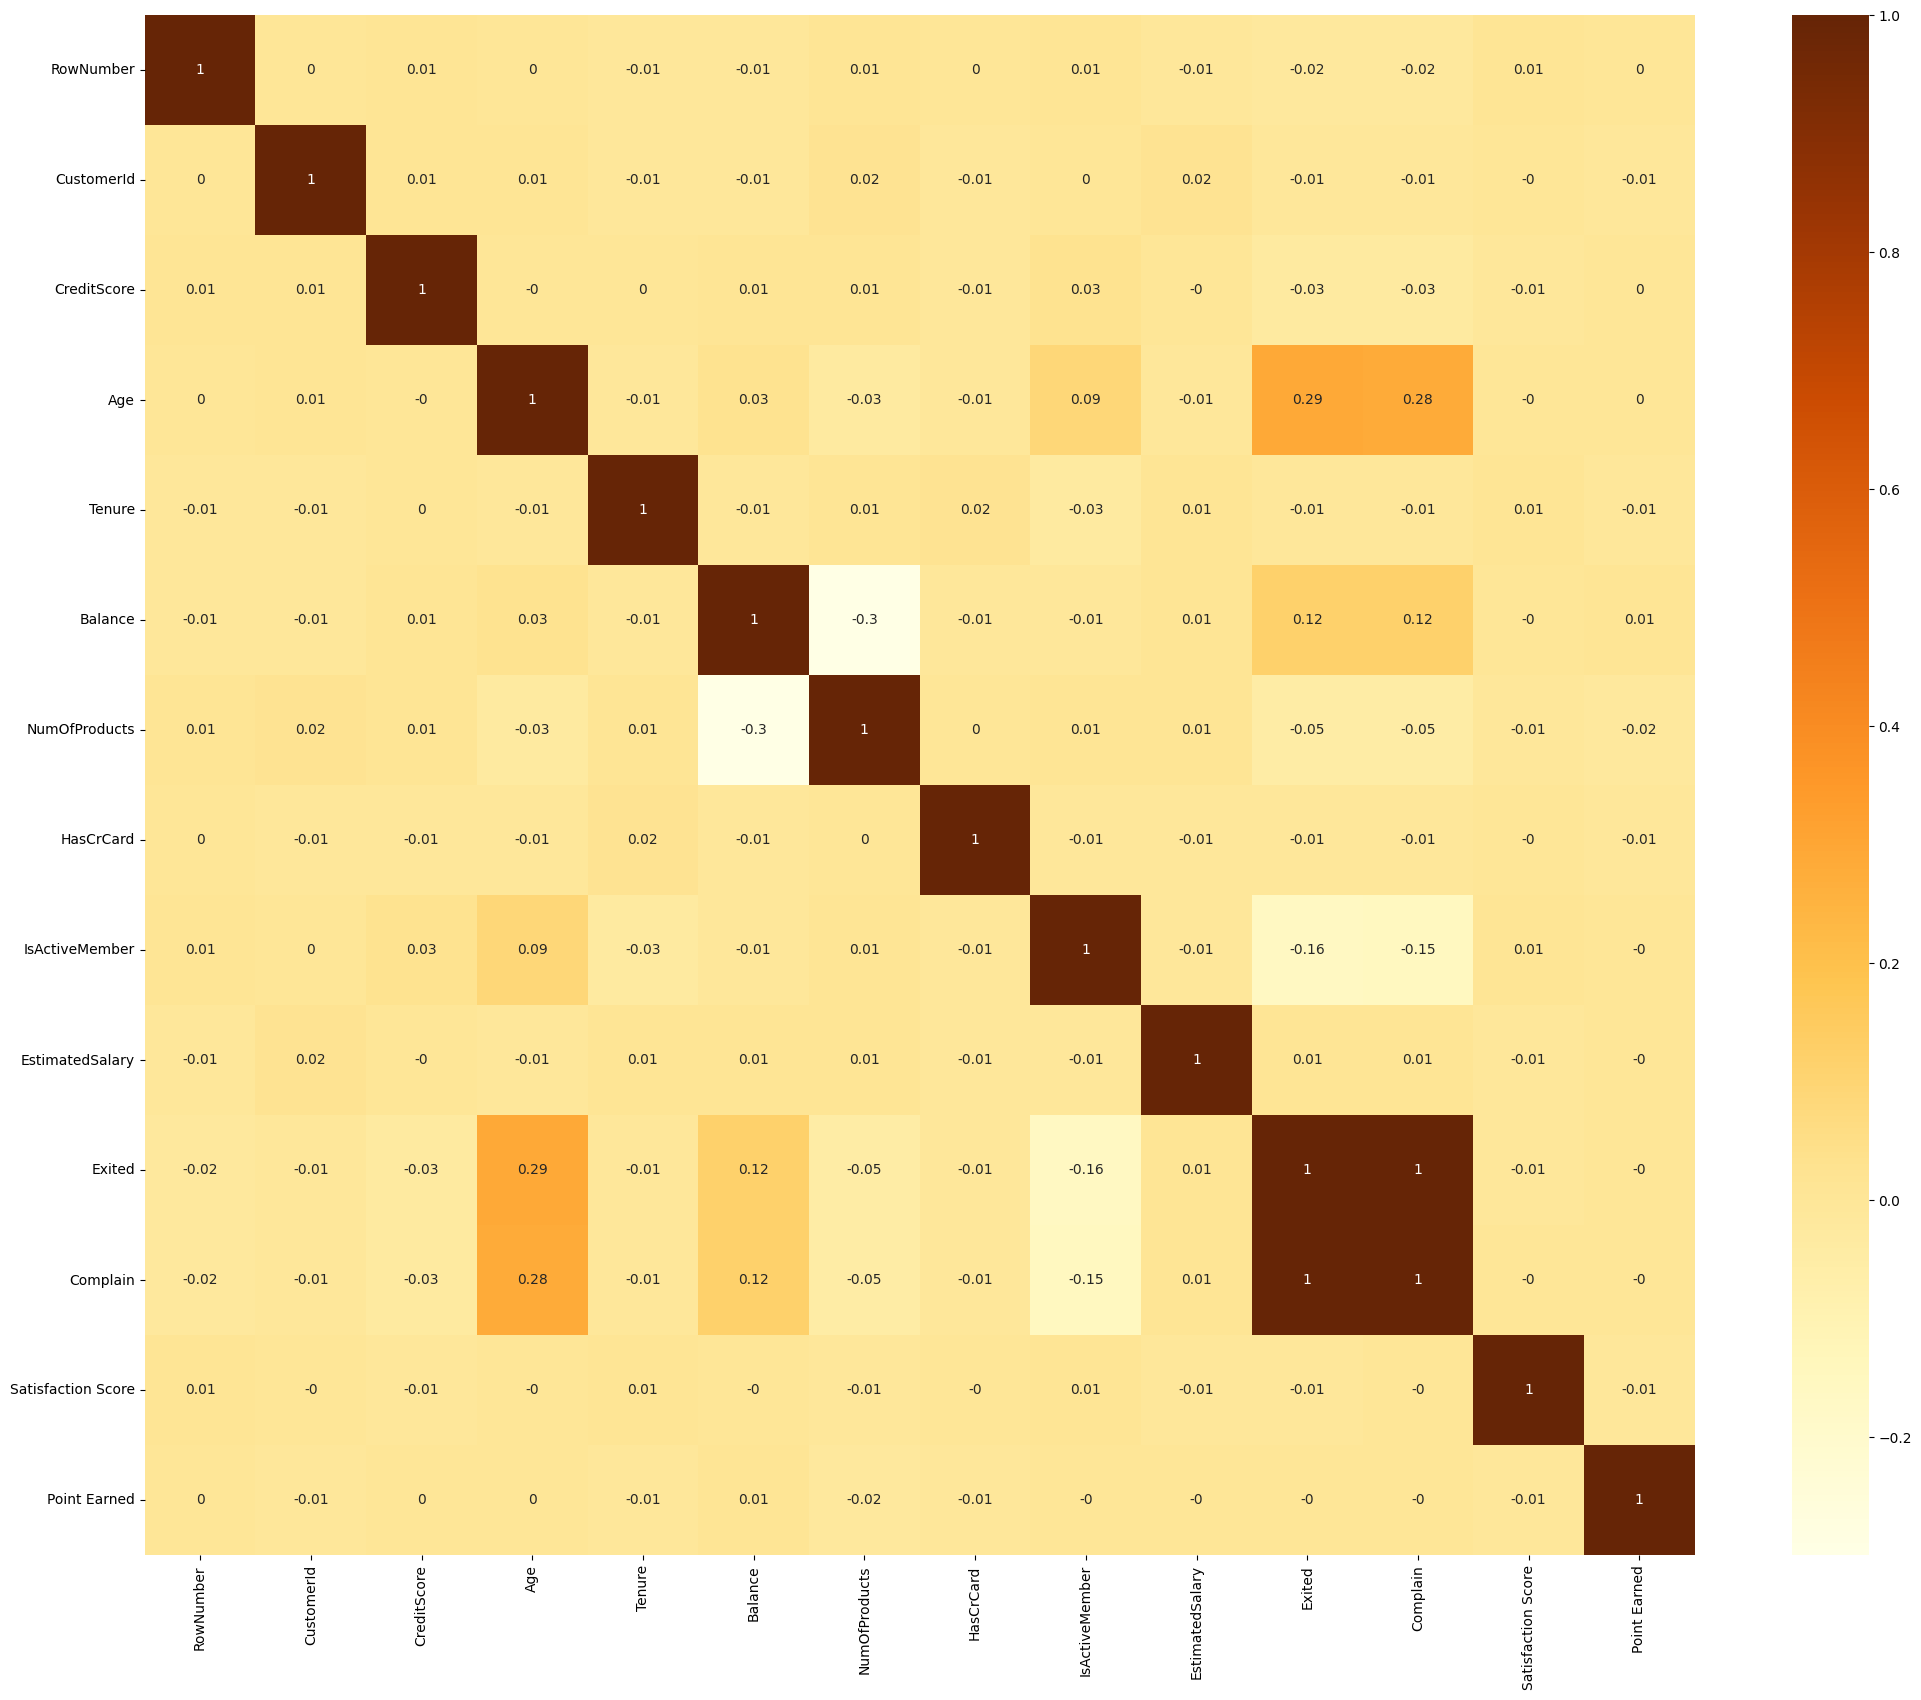

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

Here, looking at the correlation of our variables, we can see that we have 100% correlation between the target variables and the Complain variable, so let's eliminate the Complain variable.

In [ ]:
df = df.drop('Complain', axis = 1)

### Data Visualization

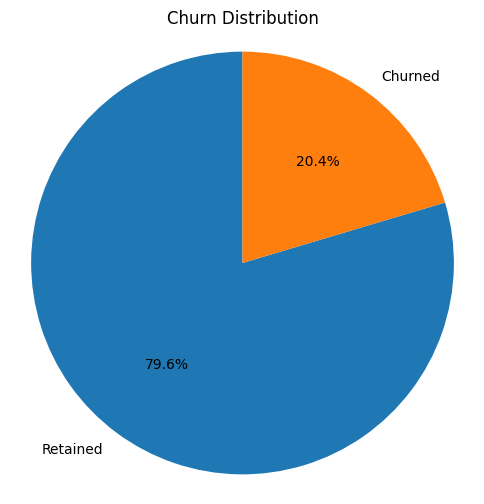

In [ ]:
# Churn distribution
plt.figure(figsize=(6, 6))
churn_counts = df['Exited'].value_counts()
plt.pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Churn Distribution')
plt.show()

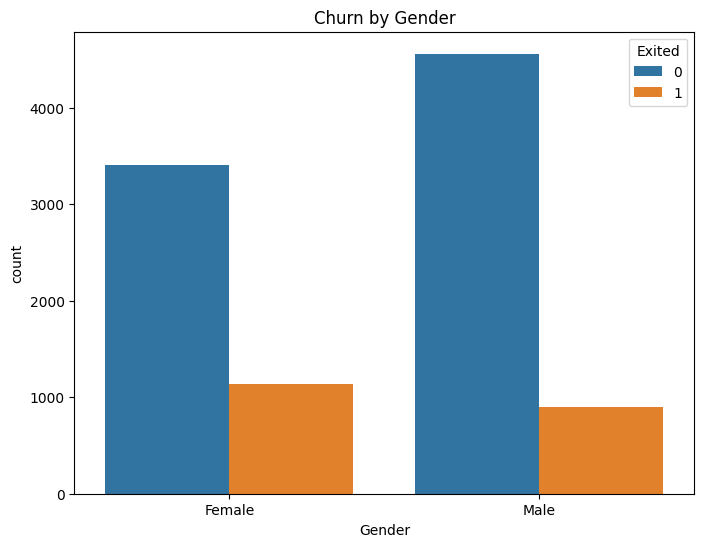

In [ ]:
# Churn by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()

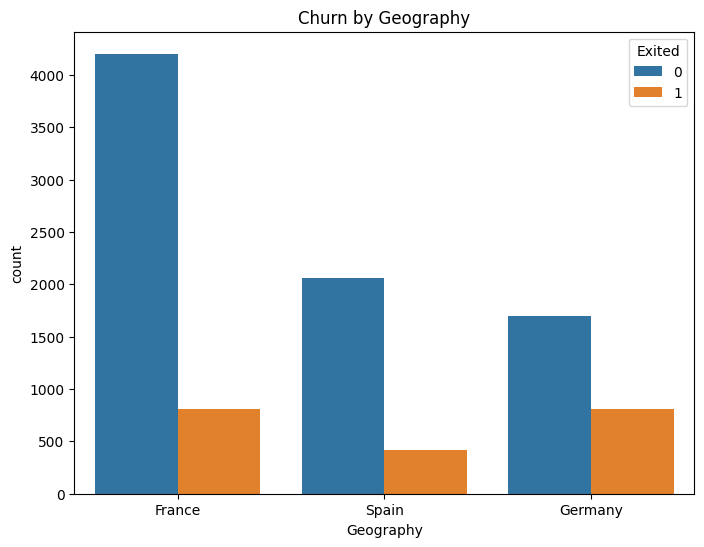

In [ ]:
# Churn by geography
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

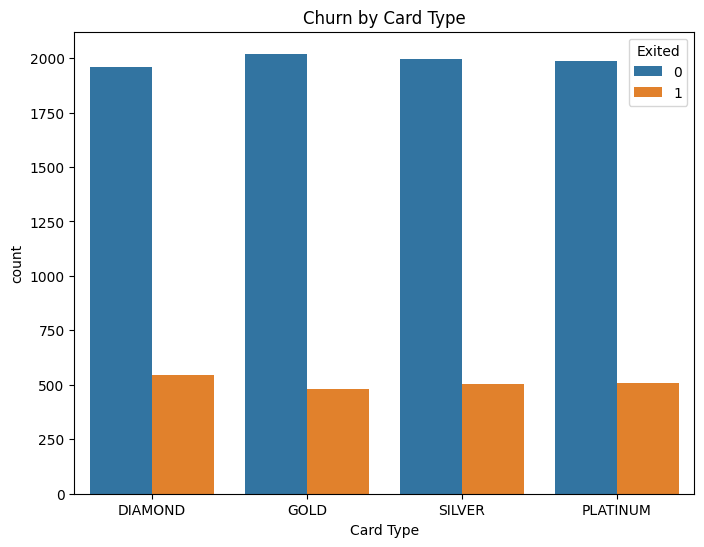

In [ ]:
# Churn by card type
plt.figure(figsize=(8, 6))
sns.countplot(x='Card Type', hue='Exited', data=df)
plt.title('Churn by Card Type')
plt.show()

### Insights

In [ ]:
# Churn rate by gender
churn_rate_gender = df.groupby('Gender')['Exited'].mean()
print(churn_rate_gender)

Gender
Female    0.250715
Male      0.164743
Name: Exited, dtype: float64


Based on the provided dataset, the churn rate by gender is as follows:

Female: 25.1%
Male: 16.5%

This means that the churn rate for female customers is higher (25.1%) compared to male customers (16.5%). This indicates that gender may play a role in customer churn, with female customers being more likely to churn.

In [ ]:
# Churn rate by geography
churn_rate_geography = df.groupby('Geography')['Exited'].mean()
print(churn_rate_geography)

Geography
France     0.161747
Germany    0.324432
Spain      0.166734
Name: Exited, dtype: float64


Based on the provided dataset, the churn rate by geography is as follows:

France: 16.2%
Germany: 32.4%
Spain: 16.7%

This indicates that the churn rate is highest in Germany (32.4%), followed by Spain (16.7%) and France (16.2%). This suggests that geographic location may impact customer churn, with customers in certain countries more prone to churn.

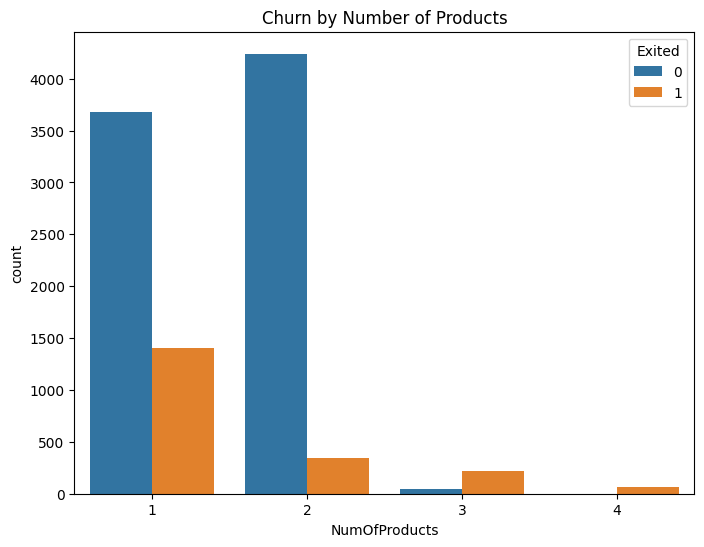

In [ ]:
# Churn by Number of Products:
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')
plt.show()

The number of products held by customers can impact churn. Customers with fewer products may be less likely to churn, while those with more products may have a higher churn rate. Further analysis is required to understand the specific relationship.

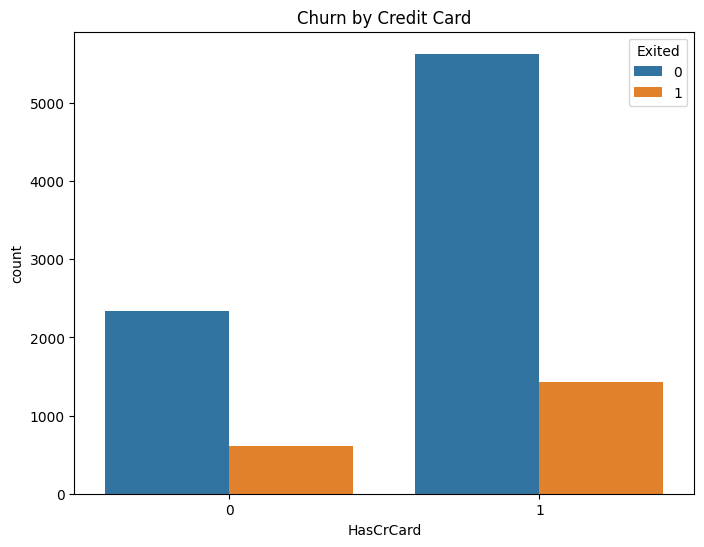

In [ ]:
# Churn by Credit Card
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by Credit Card')
plt.show()

Having a credit card does not seem to have a significant impact on customer churn. The churn rate appears similar for customers with and without a credit card. Therefore, credit card ownership alone may not be a strong indicator of churn.

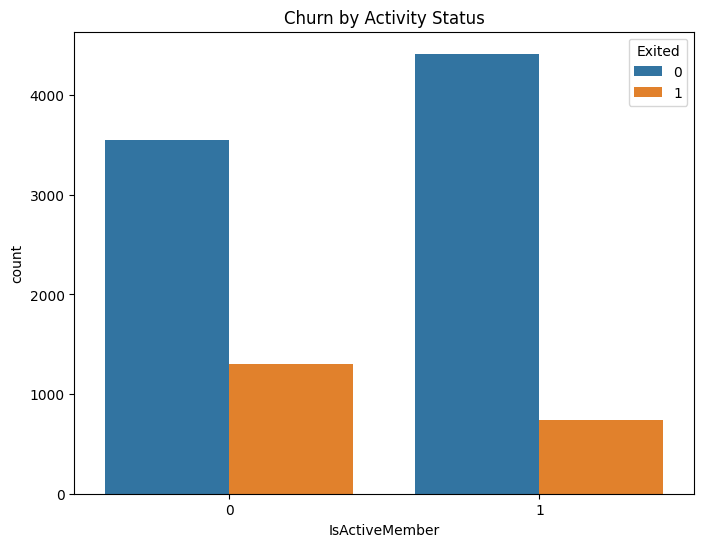

In [ ]:
# Churn by Activity Status
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')
plt.show()

Customer activity status is another important factor. Active members appear to have a lower churn rate compared to inactive members. This suggests that engaged and active customers are more likely to stay with the bank.

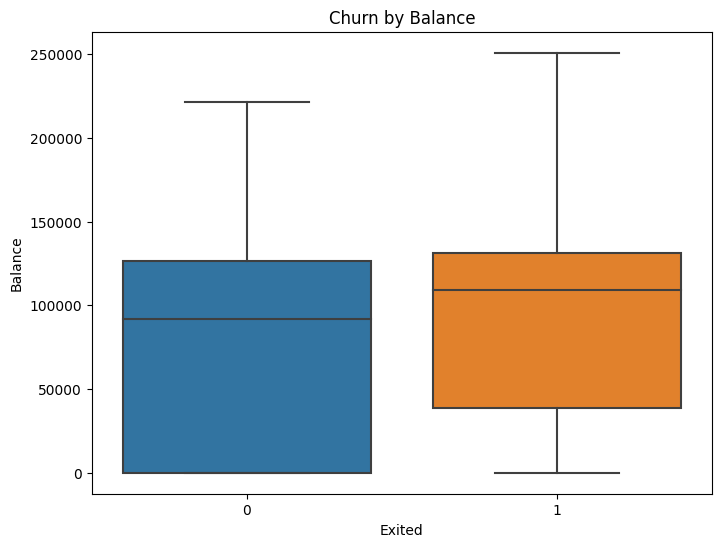

In [ ]:
# Churn by Balance:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Churn by Balance')
plt.show()

The distribution of account balances does not show a clear distinction between churned and retained customers. Further analysis and feature engineering may be required to explore the relationship between balance and churn in more detail.

####To gain deeper insights, We can perform more in-depth analysis, feature engineering, and predictive modeling using appropriate techniques and algorithms.

## Encoding

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
hot = pd.get_dummies(df[['Geography', 'Gender', 'Card Type']])

In [ ]:
df = pd.concat([df, hot], axis = 1)
df = df.drop(['Geography', 'Gender', 'Card Type'], axis = 1)

In [ ]:
# @title Văn bản tiêu đề mặc định
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,5,425,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,300,1,0,0,0,1,1,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,5,771,1,0,0,0,1,0,0,1,0
9997,709,36,7,0.00,1,0,1,42085.58,1,3,564,1,0,0,1,0,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,2,339,0,1,0,0,1,0,1,0,0


In [ ]:
X = df.drop('Exited', axis = 1)
X = X.values
y = df['Exited']

In [ ]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

## Standardize Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
data_minmax=scaler.fit_transform(df)
df_minmax=pd.DataFrame(data=data_minmax, columns=df.columns)
df_minmax.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.25,0.391600,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.50,0.382520,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.50,0.292849,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.00,0.262202,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.00,0.347333,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


## 1. Model with all festures

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

### Balancing Classes:

As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

### 2.1 Model Training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
models = [
    LogisticRegression(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(n_neighbors=int(7)),
    SVC()
]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rp = classification_report(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    print(f"""
    model: {model}
      classification report:\n {rp}
      confusion matrix:\n {cf}
    """)


    model: LogisticRegression()
      classification report:
               precision    recall  f1-score   support

           0       0.91      0.70      0.79      2378
           1       0.39      0.73      0.51       622

    accuracy                           0.71      3000
   macro avg       0.65      0.71      0.65      3000
weighted avg       0.80      0.71      0.73      3000

      confusion matrix:
 [[1668  710]
 [ 171  451]]
    

    model: GaussianNB()
      classification report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.80      2378
           1       0.39      0.70      0.50       622

    accuracy                           0.71      3000
   macro avg       0.64      0.71      0.65      3000
weighted avg       0.79      0.71      0.73      3000

      confusion matrix:
 [[1698  680]
 [ 188  434]]
    

    model: DecisionTreeClassifier()
      classification report:
               precision    recall  f1-score   s

### 2.1 Bagging

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

models = [
    ('LR', LogisticRegression()),
    ('NB', GaussianNB()),
    ]

ensemble = VotingClassifier(estimators=models, voting='hard')
ensemble.fit(X_train, y_train)
y_pred = model.predict(X_test)
rp = classification_report(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
print(f"""
model: {model}
  classification report:\n {rp}
  confusion matrix:\n {cf}
""")


model: SVC()
  classification report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86      2378
           1       0.50      0.74      0.60       622

    accuracy                           0.79      3000
   macro avg       0.71      0.77      0.73      3000
weighted avg       0.83      0.79      0.81      3000

  confusion matrix:
 [[1917  461]
 [ 163  459]]



### 2.3 Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = [
    AdaBoostClassifier(n_estimators=100),
    GradientBoostingClassifier(n_estimators=100),
    XGBClassifier(n_estimators=100),
    LGBMClassifier(n_estimators=100),
]

In [ ]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rp = classification_report(y_test, y_pred)
    cf = confusion_matrix(y_test, y_pred)
    print(f"""
    model: {model}
      classification report:\n {rp}
      confusion matrix:\n {cf}
    """)


    model: AdaBoostClassifier(n_estimators=100)
      classification report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85      2378
           1       0.48      0.78      0.59       622

    accuracy                           0.78      3000
   macro avg       0.70      0.78      0.72      3000
weighted avg       0.84      0.78      0.79      3000

      confusion matrix:
 [[1846  532]
 [ 136  486]]
    

    model: GradientBoostingClassifier()
      classification report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      2378
           1       0.50      0.77      0.61       622

    accuracy                           0.80      3000
   macro avg       0.72      0.78      0.73      3000
weighted avg       0.84      0.80      0.81      3000

      confusion matrix:
 [[1910  468]
 [ 146  476]]
    

    model: XGBClassifier(base_score=None, booster=None, callbacks=None,
         